In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from copy import deepcopy
np.random.seed(69420)

In [52]:
# Random dataset with 20 000 users and 10 000 items
n_users = 5000
n_movies = 2000
Y = np.random.randint(0, 6, (n_movies, n_users))
r = np.random.randint(0, 2, (n_movies, n_users))

In [53]:
# # generating mapping for test, validation, and train
train_size = 0.6

# r_train = np.zeros((n_movies, n_users))
# r_train[:int(n_movies*train_size), :int(n_users*train_size)] = 1
# np.random.shuffle(r_train)
# r_cv = np.ones((n_movies, n_users)) - r_train
# r_cv[:int(n_movies*0.5), :int(n_users*0.5)] = 0
# r_test = np.ones((n_movies, n_users)) - r_train - r_cv

In [54]:
# Learning parameters
n_parameters = 200
lambd = 100
# X = np.random.randn(n_movies, n_parameters)/100
# theta = np.random.randn(n_users, n_parameters)/100

In [58]:
class MatrixFactorization(object):
    def __init__(self, Y, r, n_parameters, train_size, lambd):
        """
        Initializer of matrix factorization learning algorithm. 

        Parameters:
            Y (array): numpy array of shape (n_items, n_movies) with all users and movies rated
            r (array): numpy array of 0s and 1s representing which movies were rated by respective user, shape (n_items, n_movies)
            n_parameters (int): number of parameters for algorithm, (ex. genres) which will be learned
            train_size (float): train dataset split from range 0.1-0.9, validation and test will be crated atumaticly from left records
            lambd (float): parameter used for regularization, greater value means less overfitting
        """
        self.n_movies = Y.shape[0]
        self.n_users = Y.shape[1]
        self.Y = Y
        self.r = r
        self.lambd = lambd
        self.train_size = train_size
        self.n_parameters = n_parameters

        # generating mapping for test, validation, and train
        self.r_train = np.zeros((self.n_movies, self.n_users))
        self.r_train[:int(self.n_movies*train_size), :int(self.n_users*train_size)] = 1
        np.random.shuffle(self.r_train)
        self.r_cv = np.ones((self.n_movies, self.n_users)) - self.r_train
        self.r_cv[:int(self.n_movies*0.5), :int(self.n_users*0.5)] = 0
        self.r_test = np.ones((self.n_movies, self.n_users)) - self.r_train - self.r_cv

        # defining learning parameters
        self.X = np.random.randn(self.n_movies, self.n_parameters)/100
        self.theta = np.random.randn(self.n_users, self.n_parameters)/100

    def loss(self, Y):
        """
        Method of class MatrixFactorization that computes the loss
        Parameters:
            Y (array): numpy array of shape (n_items, n_movies) with users and movies rated
        Returns:
            float: calculated loss
        """
        return 1/2 * np.sum(np.power(self.X.dot(self.theta.T) - Y, 2) * self.r) + self.lambd/2 * np.sum(np.power(self.X, 2)) + self.lambd/2 * np.sum(np.power(self.X, 2))

    def compute_gradients(self, Y):
        """
        Method of class MatrixFactorization that computes the loss
        Parameters:
            Y (array): numpy array of shape (n_items, n_movies) with users and movies rated
        Returns:
            float: computed gradients
        """

        X_grad = ((self.X.dot(self.theta.T) - Y) * self.r).dot(self.theta) + self.lambd*self.X
        theta_grad = ((self.X.dot(self.theta.T) - Y) * self.r).T.dot(self.X) + self.lambd*self.theta

        return X_grad, theta_grad
    
    def fit(self, epochs = 10 , learning_rate = 0.0001, early_stopping = 5, early_stopping_error = 0.001, verbose = 0):
        """
        Method of class MatrixFactorization fits the learning parameters
        Parameters:
            epochs (int): Number of iterations of learning algorithm, defaults to 10
            learning_rate (float): Learning rate of learning algorithm, defaults to 0.0001
            early_stopping (int): Defines how many iterations algorithm should consider for early stopping backwards, defaults to 5.
            early_stopping_error (float): Early stopping error. Defaults to 10e-3
            verbose (int): verbose = 0 -> no printing, verbose >=1 -> printing.
        Returns:
            tuple: Learned parameters for users, for movies, history of train losses, and validation losses
        """
        losses_train = []
        losses_cv = []
        Xs = []
        thetas = []

        for epoch in range(epochs):
            
            # compute gradients
            X_grad, theta_grad = self.compute_gradients(self.Y*self.r_train)

            # update parameters
            self.X = self.X - learning_rate*X_grad
            self.theta = self.theta - learning_rate*theta_grad

            Xs.append(deepcopy(self.X))
            thetas.append(deepcopy(self.theta))
            J_train = self.loss(self.Y*self.r_train)
            J_cv = self.loss(self.Y*self.r_cv)
            losses_train.append(J_train)
            losses_cv.append(J_cv)

            if verbose >= 1:
                print('epoch {}, train loss: {} val loss: {} '.format(epoch, J_train, J_cv))

            # early stopping
            if len(Xs) >= early_stopping:
                if abs(losses_cv[-early_stopping] - min(losses_cv[-early_stopping : ])) < early_stopping_error:
                    if verbose >= 1:
                        print('early stopping')
                    self.X = Xs[-early_stopping]
                    self.thetas = thetas[-early_stopping]
                    return Xs[-early_stopping], thetas[-early_stopping], losses_train, losses_cv
                else:
                    thetas.pop(0)
                    Xs.pop(0)

        return self.X, self.theta, costs_train, costs_cv
    
    def reccomend(self, users, n):
        pass


In [59]:
MF = MatrixFactorization(Y, r, n_parameters, train_size ,lambd)
X, theta, costs_train, costs_cv = MF.fit(epochs = 100, learning_rate = 0.0005, early_stopping = 20, early_stopping_error = 0.001, verbose = 1)

epoch 0, train loss: 8258331.6060196 val loss: 12310817.467414841 
epoch 1, train loss: 8257470.344167824 val loss: 12310505.253257986 
epoch 2, train loss: 8255391.5528099695 val loss: 12310302.523048002 
epoch 3, train loss: 8247453.688072913 val loss: 12310410.37756525 
epoch 4, train loss: 8212601.7423314415 val loss: 12311840.577418027 
epoch 5, train loss: 8056775.22279157 val loss: 12320512.439828742 
epoch 6, train loss: 7392639.711911299 val loss: 12388822.13711483 
epoch 7, train loss: 5184742.905047067 val loss: 13156131.643296883 
epoch 8, train loss: 3119151.3349623913 val loss: 18826111.418022152 
epoch 9, train loss: 3143723.115912595 val loss: 16831677.8828777 
epoch 10, train loss: 3163660.9251711927 val loss: 19367420.949298073 
epoch 11, train loss: 3236637.9920128006 val loss: 16228513.584167501 
epoch 12, train loss: 3258611.5808011065 val loss: 20104098.472119205 
epoch 13, train loss: 3434540.47229422 val loss: 15472582.854500769 
epoch 14, train loss: 3388783.83

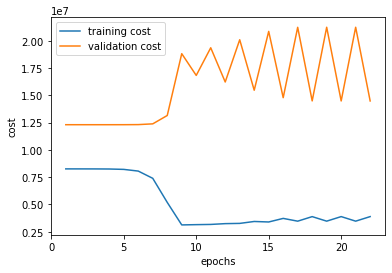

In [60]:
plt.plot(range(1, len(costs_train)+1), costs_train, label = 'training cost')
plt.plot(range(1, len(costs_cv)+1), costs_cv, label = 'validation cost')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()